## Preparation

We have initialized the data from Solomon's instances, and shown the scatter plot so far. It's time for us to try some solution approaches including exact algorithms and meta-heuritic algorithms. 

> Here, we are gonna try genetic algorithm first. 


In [7]:
!pip install deap

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 139 kB 25.9 MB/s eta 0:00:01


In [19]:
import os
import io
import fnmatch
from json import load, dump

import matplotlib.pyplot as plt
import pandas as pd

import os
import io
import random
from csv import DictWriter
from deap import base, creator, tools


BASE_DIR = os.path.abspath(os.path.dirname(os.path.dirname('.')))
text_data_dir = os.path.join(BASE_DIR, 'data', 'solomon-100-original')
json_data_dir = os.path.join(BASE_DIR, 'data', 'solomon-100-json')

Write to file: /data/home/exx866/VRPTW/data/solomon-100-json/RC201.json
Write to file: /data/home/exx866/VRPTW/data/solomon-100-json/RC204.json
Write to file: /data/home/exx866/VRPTW/data/solomon-100-json/RC206.json
Write to file: /data/home/exx866/VRPTW/data/solomon-100-json/C205.json
Write to file: /data/home/exx866/VRPTW/data/solomon-100-json/RC207.json
Write to file: /data/home/exx866/VRPTW/data/solomon-100-json/C106.json
Write to file: /data/home/exx866/VRPTW/data/solomon-100-json/R109.json
Write to file: /data/home/exx866/VRPTW/data/solomon-100-json/R204.json
Write to file: /data/home/exx866/VRPTW/data/solomon-100-json/C206.json
Write to file: /data/home/exx866/VRPTW/data/solomon-100-json/C107.json
Write to file: /data/home/exx866/VRPTW/data/solomon-100-json/R205.json
Write to file: /data/home/exx866/VRPTW/data/solomon-100-json/C101.json
Write to file: /data/home/exx866/VRPTW/data/solomon-100-json/RC105.json
Write to file: /data/home/exx866/VRPTW/data/solomon-100-json/RC106.json


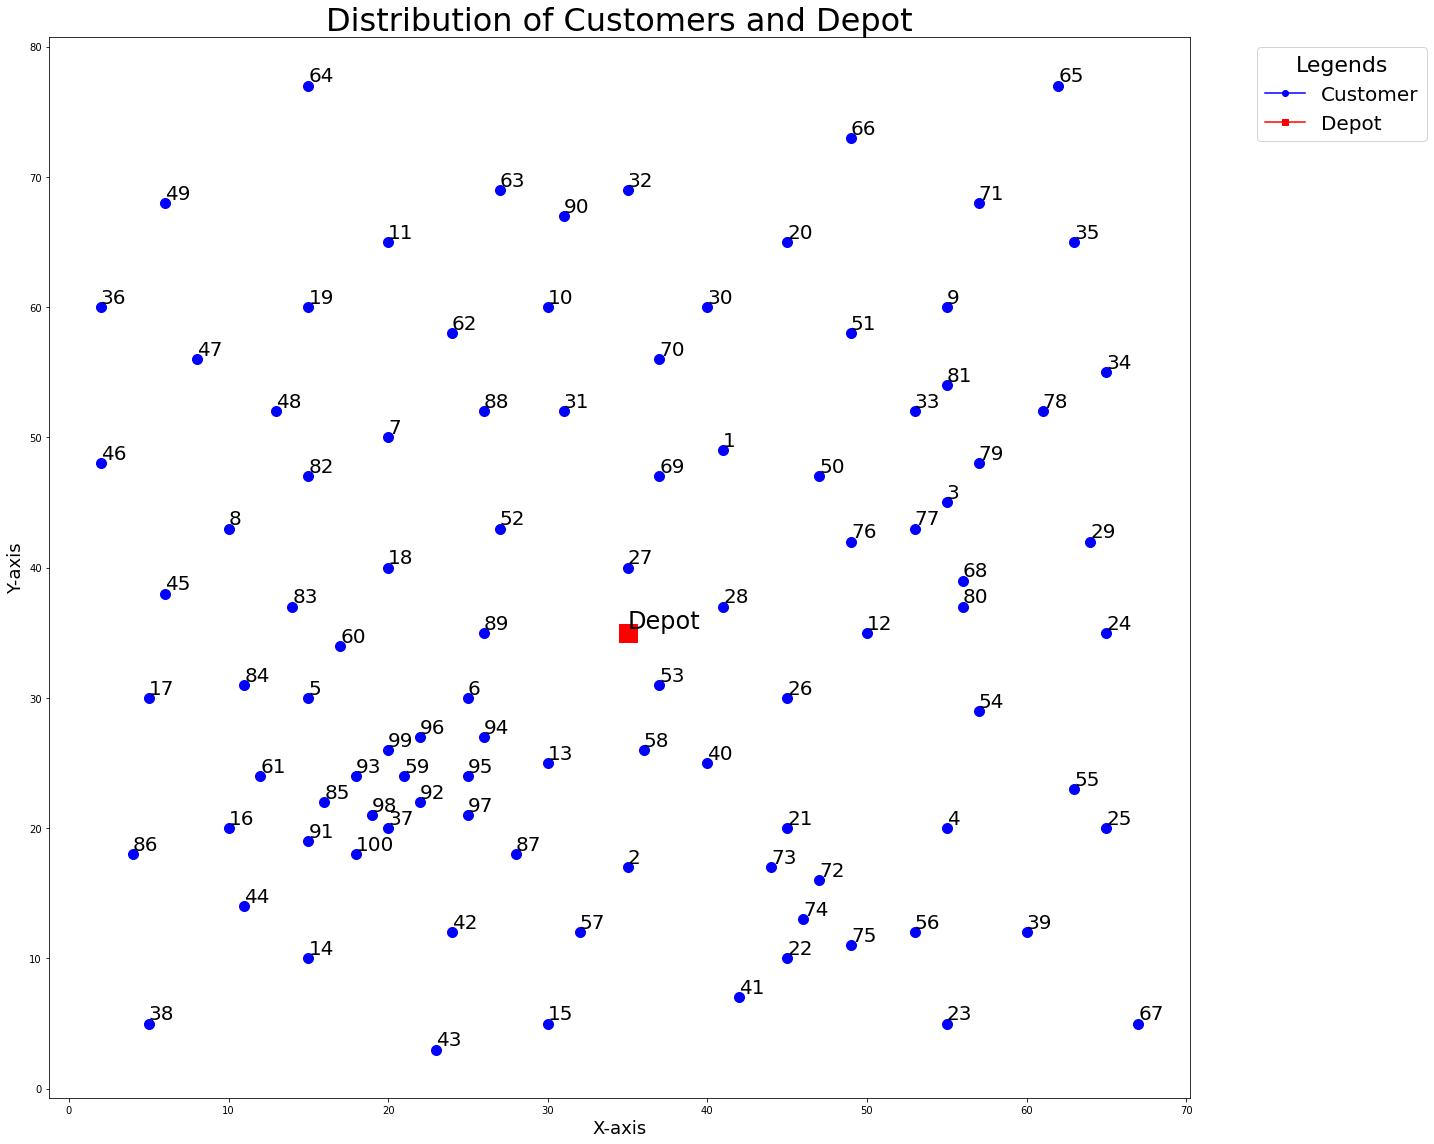

In [2]:
%run initialize_data.ipynb

In [3]:
instance_name = 'R101'
json_file = os.path.join(json_data_dir, f'{instance_name}.json')
instance = load_instance(json_file=json_file)
if instance is None:
    print('The instance is None')
    exit

File: /data/home/exx866/VRPTW/data/solomon-100-json/R101.json exists.


## individual 

In [4]:
def ind2route(individual, instance):
    route = []
    vehicle_capacity = instance['vehicle_capacity']
    depart_due_time = instance['depot']['due_time']
    # Initialize a sub-route
    sub_route = []
    vehicle_load = 0
    elapsed_time = 0
    last_customer_id = 0
    for customer_id in individual:
        # Update vehicle load
        demand = instance[f'customer_{customer_id}']['demand']
        updated_vehicle_load = vehicle_load + demand
        # Update elapsed time
        service_time = instance[f'customer_{customer_id}']['service_time']
        return_time = instance['distance_matrix'][customer_id][0]
        updated_elapsed_time = elapsed_time + \
            instance['distance_matrix'][last_customer_id][customer_id] + service_time + return_time
        # Validate vehicle load and elapsed time
        if (updated_vehicle_load <= vehicle_capacity) and (updated_elapsed_time <= depart_due_time):
            # Add to current sub-route
            sub_route.append(customer_id)
            vehicle_load = updated_vehicle_load
            elapsed_time = updated_elapsed_time - return_time
        else:
            # Save current sub-route
            route.append(sub_route)
            # Initialize a new sub-route and add to it
            sub_route = [customer_id]
            vehicle_load = demand
            elapsed_time = instance['distance_matrix'][0][customer_id] + service_time
        # Update last customer ID
        last_customer_id = customer_id
    if sub_route != []:
        # Save current sub-route before return if not empty
        route.append(sub_route)
    return route


def print_route(route, merge=False):
    '''gavrptw.core.print_route(route, merge=False)'''
    route_str = '0'
    sub_route_count = 0
    for sub_route in route:
        sub_route_count += 1
        sub_route_str = '0'
        for customer_id in sub_route:
            sub_route_str = f'{sub_route_str} - {customer_id}'
            route_str = f'{route_str} - {customer_id}'
        sub_route_str = f'{sub_route_str} - 0'
        if not merge:
            print(f'  Vehicle {sub_route_count}\'s route: {sub_route_str}')
        route_str = f'{route_str} - 0'
    if merge:
        print(route_str)

In [14]:
# check the function
ind_size = 100
ind = list(range(1, ind_size + 1))
random.shuffle(ind)

route = ind2route(ind, instance)
print_route(route)

  Vehicle 1's route: 0 - 57 - 84 - 37 - 21 - 78 - 0
  Vehicle 2's route: 0 - 7 - 80 - 53 - 48 - 0
  Vehicle 3's route: 0 - 64 - 45 - 59 - 88 - 0
  Vehicle 4's route: 0 - 15 - 67 - 41 - 77 - 0
  Vehicle 5's route: 0 - 65 - 4 - 26 - 12 - 0
  Vehicle 6's route: 0 - 75 - 1 - 87 - 44 - 28 - 0
  Vehicle 7's route: 0 - 19 - 11 - 66 - 24 - 0
  Vehicle 8's route: 0 - 5 - 76 - 69 - 13 - 30 - 0
  Vehicle 9's route: 0 - 42 - 54 - 98 - 92 - 0
  Vehicle 10's route: 0 - 49 - 8 - 95 - 29 - 0
  Vehicle 11's route: 0 - 51 - 34 - 99 - 9 - 0
  Vehicle 12's route: 0 - 82 - 91 - 86 - 40 - 47 - 0
  Vehicle 13's route: 0 - 32 - 94 - 63 - 0
  Vehicle 14's route: 0 - 73 - 46 - 61 - 22 - 0
  Vehicle 15's route: 0 - 81 - 72 - 36 - 0
  Vehicle 16's route: 0 - 2 - 79 - 96 - 23 - 0
  Vehicle 17's route: 0 - 18 - 20 - 43 - 97 - 0
  Vehicle 18's route: 0 - 70 - 17 - 14 - 62 - 60 - 0
  Vehicle 19's route: 0 - 52 - 50 - 3 - 93 - 83 - 33 - 0
  Vehicle 20's route: 0 - 89 - 58 - 74 - 6 - 10 - 0
  Vehicle 21's route: 0 - 55

In [15]:
def eval_vrptw(individual, instance, unit_cost=1.0, init_cost=0, wait_cost=0, delay_cost=0):
    '''gavrptw.core.eval_vrptw(individual, instance, unit_cost=1.0, init_cost=0, wait_cost=0,
        delay_cost=0)'''
    total_cost = 0
    route = ind2route(individual, instance)
    total_cost = 0
    for sub_route in route:
        sub_route_time_cost = 0
        sub_route_distance = 0
        elapsed_time = 0
        last_customer_id = 0
        for customer_id in sub_route:
            # Calculate section distance
            distance = instance['distance_matrix'][last_customer_id][customer_id]
            # Update sub-route distance
            sub_route_distance = sub_route_distance + distance
            # Calculate time cost
            arrival_time = elapsed_time + distance
            time_cost = wait_cost * max(instance[f'customer_{customer_id}']['ready_time'] - \
                arrival_time, 0) + delay_cost * max(arrival_time - \
                instance[f'customer_{customer_id}']['due_time'], 0)
            # Update sub-route time cost
            sub_route_time_cost = sub_route_time_cost + time_cost
            # Update elapsed time
            elapsed_time = arrival_time + instance[f'customer_{customer_id}']['service_time']
            # Update last customer ID
            last_customer_id = customer_id
        # Calculate transport cost
        sub_route_distance = sub_route_distance + instance['distance_matrix'][last_customer_id][0]
        sub_route_transport_cost = init_cost + unit_cost * sub_route_distance
        # Obtain sub-route cost
        sub_route_cost = sub_route_time_cost + sub_route_transport_cost
        # Update total cost
        total_cost = total_cost + sub_route_cost
    fitness = 1.0 / total_cost
    return (fitness, )

In [16]:
score = eval_vrptw(ind, instance)
score

(0.00026884371896616915,)

In [20]:
def merge_rules(rules):
    '''gavrptw.uitls.merge_rules(rules)'''
    is_fully_merged = True
    for round1 in rules:
        if round1[0] == round1[1]:
            rules.remove(round1)
            is_fully_merged = False
        else:
            for round2 in rules:
                if round2[0] == round1[1]:
                    rules.append((round1[0], round2[1]))
                    rules.remove(round1)
                    rules.remove(round2)
                    is_fully_merged = False
    return rules, is_fully_merged

In [21]:
def cx_partially_matched(ind1, ind2):
    '''gavrptw.core.cx_partially_matched(ind1, ind2)'''
    cxpoint1, cxpoint2 = sorted(random.sample(range(min(len(ind1), len(ind2))), 2))
    part1 = ind2[cxpoint1:cxpoint2+1]
    part2 = ind1[cxpoint1:cxpoint2+1]
    rule1to2 = list(zip(part1, part2))
    is_fully_merged = False
    while not is_fully_merged:
        rule1to2, is_fully_merged = merge_rules(rules=rule1to2)
    rule2to1 = {rule[1]: rule[0] for rule in rule1to2}
    rule1to2 = dict(rule1to2)
    ind1 = [gene if gene not in part2 else rule2to1[gene] for gene in ind1[:cxpoint1]] + part2 + \
        [gene if gene not in part2 else rule2to1[gene] for gene in ind1[cxpoint2+1:]]
    ind2 = [gene if gene not in part1 else rule1to2[gene] for gene in ind2[:cxpoint1]] + part1 + \
        [gene if gene not in part1 else rule1to2[gene] for gene in ind2[cxpoint2+1:]]
    return ind1, ind2


def mut_inverse_indexes(individual):
    '''gavrptw.core.mut_inverse_indexes(individual)'''
    start, stop = sorted(random.sample(range(len(individual)), 2))
    temp = individual[start:stop+1]
    temp.reverse()
    individual[start:stop+1] = temp
    return (individual, )

In [24]:
def run_gavrptw(instance_name, unit_cost, init_cost, wait_cost, delay_cost, ind_size, pop_size, \
    cx_pb, mut_pb, n_gen, export_csv=False, customize_data=False):
    if customize_data:
        json_data_dir = os.path.join(BASE_DIR, 'data', 'json_customize')
    else:
        json_data_dir = os.path.join(BASE_DIR, 'data', 'solomon-100-json')
    json_file = os.path.join(json_data_dir, f'{instance_name}.json')
    instance = load_instance(json_file=json_file)
    if instance is None:
        return
    creator.create('FitnessMax', base.Fitness, weights=(1.0, ))
    creator.create('Individual', list, fitness=creator.FitnessMax)
    toolbox = base.Toolbox()
    # Attribute generator
    toolbox.register('indexes', random.sample, range(1, ind_size + 1), ind_size)
    # Structure initializers
    toolbox.register('individual', tools.initIterate, creator.Individual, toolbox.indexes)
    toolbox.register('population', tools.initRepeat, list, toolbox.individual)
    # Operator registering
    toolbox.register('evaluate', eval_vrptw, instance=instance, unit_cost=unit_cost, \
        init_cost=init_cost, wait_cost=wait_cost, delay_cost=delay_cost)
    toolbox.register('select', tools.selRoulette)
    toolbox.register('mate', cx_partially_matched)
    toolbox.register('mutate', mut_inverse_indexes)
    pop = toolbox.population(n=pop_size)
    # Results holders for exporting results to CSV file
    csv_data = []
    print('Start of evolution')
    # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit
    print(f'  Evaluated {len(pop)} individuals')
    # Begin the evolution
    for gen in range(n_gen):
        print(f'-- Generation {gen} --')
        # Select the next generation individuals
        offspring = toolbox.select(pop, len(pop))
        # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))
        # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < cx_pb:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values
        for mutant in offspring:
            if random.random() < mut_pb:
                toolbox.mutate(mutant)
                del mutant.fitness.values
        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
        print(f'  Evaluated {len(invalid_ind)} individuals')
        # The population is entirely replaced by the offspring
        pop[:] = offspring
        # Gather all the fitnesses in one list and print the stats
        fits = [ind.fitness.values[0] for ind in pop]
        length = len(pop)
        mean = sum(fits) / length
        sum2 = sum([x**2 for x in fits])
        std = abs(sum2 / length - mean**2)**0.5
#         print(f'  Min {min(fits)}')
#         print(f'  Max {max(fits)}')
        print(f'  Avg {mean}')
#         print(f'  Std {std}')
        # Write data to holders for exporting results to CSV file
        if export_csv:
            csv_row = {
                'generation': gen,
                'evaluated_individuals': len(invalid_ind),
                'min_fitness': min(fits),
                'max_fitness': max(fits),
                'avg_fitness': mean,
                'std_fitness': std,
            }
            csv_data.append(csv_row)
    print('-- End of (successful) evolution --')
    best_ind = tools.selBest(pop, 1)[0]
    print(f'Best individual: {best_ind}')
    print(f'Fitness: {best_ind.fitness.values[0]}')
    print_route(ind2route(best_ind, instance))
    print(f'Total cost: {1 / best_ind.fitness.values[0]}')
    if export_csv:
        csv_file_name = f'{instance_name}_uC{unit_cost}_iC{init_cost}_wC{wait_cost}' \
            f'_dC{delay_cost}_iS{ind_size}_pS{pop_size}_cP{cx_pb}_mP{mut_pb}_nG{n_gen}.csv'
        csv_file = os.path.join(BASE_DIR, 'results', csv_file_name)
        print(f'Write to file: {csv_file}')
        make_dirs_for_file(path=csv_file)
        if not exist(path=csv_file, overwrite=True):
            with io.open(csv_file, 'wt', newline='') as file_object:
                fieldnames = [
                    'generation',
                    'evaluated_individuals',
                    'min_fitness',
                    'max_fitness',
                    'avg_fitness',
                    'std_fitness',
                ]
                writer = DictWriter(file_object, fieldnames=fieldnames, dialect='excel')
                writer.writeheader()
                for csv_row in csv_data:
                    writer.writerow(csv_row)

In [26]:
def main():
    '''main()'''
    random.seed(64)

    instance_name = 'R101'

    unit_cost = 8.0
    init_cost = 60.0
    wait_cost = 0.5
    delay_cost = 1.5

    ind_size = 25
    pop_size = 80
    cx_pb = 0.85
    mut_pb = 0.01
    n_gen = 100

    export_csv = False

    run_gavrptw(instance_name=instance_name, unit_cost=unit_cost, init_cost=init_cost, \
        wait_cost=wait_cost, delay_cost=delay_cost, ind_size=ind_size, pop_size=pop_size, \
        cx_pb=cx_pb, mut_pb=mut_pb, n_gen=n_gen, export_csv=export_csv)


if __name__ == '__main__':
    main()

File: /data/home/exx866/VRPTW/data/solomon-100-json/R101.json exists.
Start of evolution
  Evaluated 80 individuals
-- Generation 0 --
  Evaluated 73 individuals
  Min 9.763345499035684e-05
  Max 0.00012637256751296555
  Avg 0.00011025092708161362
  Std 6.546907888573291e-06
-- Generation 1 --
  Evaluated 68 individuals
  Min 0.00010108721705405057
  Max 0.00012637256751296555
  Avg 0.00011150920584364803
  Std 6.729618002789988e-06
-- Generation 2 --
  Evaluated 76 individuals
  Min 0.00010108721705405057
  Max 0.00012637256751296555
  Avg 0.00011247838480624498
  Std 5.564957782953168e-06
-- Generation 3 --
  Evaluated 70 individuals
  Min 0.00010108721705405057
  Max 0.00013454256528171876
  Avg 0.00011292313412455482
  Std 6.307899996973984e-06
-- Generation 4 --
  Evaluated 74 individuals
  Min 0.00010108721705405057
  Max 0.00012637256751296555
  Avg 0.00011257017608191774
  Std 5.459432552434849e-06
-- Generation 5 --
  Evaluated 72 individuals
  Min 0.00010108721705405057
  Max

/data/home/exx866/.local/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/data/home/exx866/.local/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "



  Avg 0.00011543006570684934
  Std 5.416197816116405e-06
-- Generation 28 --
  Evaluated 70 individuals
  Min 0.00010517714084760733
  Max 0.00013666513979327925
  Avg 0.00011617420635386961
  Std 5.695482862383478e-06
-- Generation 29 --
  Evaluated 74 individuals
  Min 0.00010517714084760733
  Max 0.00013666513979327925
  Avg 0.0001169280994551834
  Std 6.15971783135607e-06
-- Generation 30 --
  Evaluated 68 individuals
  Min 0.00010517714084760733
  Max 0.00013666513979327925
  Avg 0.00011838263430874975
  Std 7.410184900261412e-06
-- Generation 31 --
  Evaluated 60 individuals
  Min 0.00010517714084760733
  Max 0.00013666513979327925
  Avg 0.00011820209294725031
  Std 7.145470691734356e-06
-- Generation 32 --
  Evaluated 72 individuals
  Min 0.00010517714084760733
  Max 0.00013666513979327925
  Avg 0.0001186362903686046
  Std 8.006303988401787e-06
-- Generation 33 --
  Evaluated 64 individuals
  Min 0.00010517714084760733
  Max 0.00013666513979327925
  Avg 0.00011928797820619696
 

  Evaluated 64 individuals
  Min 0.00013106312452068863
  Max 0.00013945688047910495
  Avg 0.00013598593536344542
  Std 3.0889511943201325e-06
-- Generation 94 --
  Evaluated 62 individuals
  Min 0.00013106312452068863
  Max 0.00013945688047910495
  Avg 0.00013562884621777055
  Std 3.297747153080641e-06
-- Generation 95 --
  Evaluated 60 individuals
  Min 0.00013106312452068863
  Max 0.00013945688047910495
  Avg 0.00013584938665527302
  Std 3.1730864402066626e-06
-- Generation 96 --
  Evaluated 72 individuals
  Min 0.00011774918667899063
  Max 0.00013945688047910495
  Avg 0.00013603752667734847
  Std 3.695842383805547e-06
-- Generation 97 --
  Evaluated 70 individuals
  Min 0.00011774918667899063
  Max 0.00013945688047910495
  Avg 0.00013590196708407727
  Std 3.77746360847566e-06
-- Generation 98 --
  Evaluated 66 individuals
  Min 0.00011774918667899063
  Max 0.00013945688047910495
  Avg 0.00013565872850886872
  Std 3.940167230155241e-06
-- Generation 99 --
  Evaluated 66 individuals
